# Exercise 1.3.2: Dimensionality Reduction (Tempest Prediction)

We have meteorological data (6 sensors) and we want to predict if there will be a tempest (Yes/No).
But 6 dimensions are too many to visualize or for some simple algorithms.

**Objective**: Compress these 6 pieces of information into just 2 or 3, while keeping the important information.

---

## Final Conclusion

**Method that best separates the two classes:** PCA

**Ideal Dimension (2D or 3D):** 3D

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# X = Sensor data (6 dimensions)
# y = Labels (0 = No tempest, 1 = Tempest)
X = np.load('../../data/dimensionality_reduction/data.npy')
y = np.load('../../data/dimensionality_reduction/labels.npy')

print(f"Loaded data: {X.shape[0]} samples, {X.shape[1]} sensors.")
print(f"Number of tempests in the dataset: {np.sum(y)}")

Loaded data: 800 samples, 6 sensors.
Number of tempests in the dataset: 333.0


## Method 1: Principal Component Analysis

This is the most classic method. It tries to "rotate" the dataset to view it from its best angle (the one that spreads the data the most). It is a **linear** method (it doesn't twist the space, it just projects it, like a shadow).

We will project our 6D data to **2D** and **3D**.

*If the blue points (0) and red points (1) are well mixed, then PCA is not enough.*
*If they are well separated, then we win.*

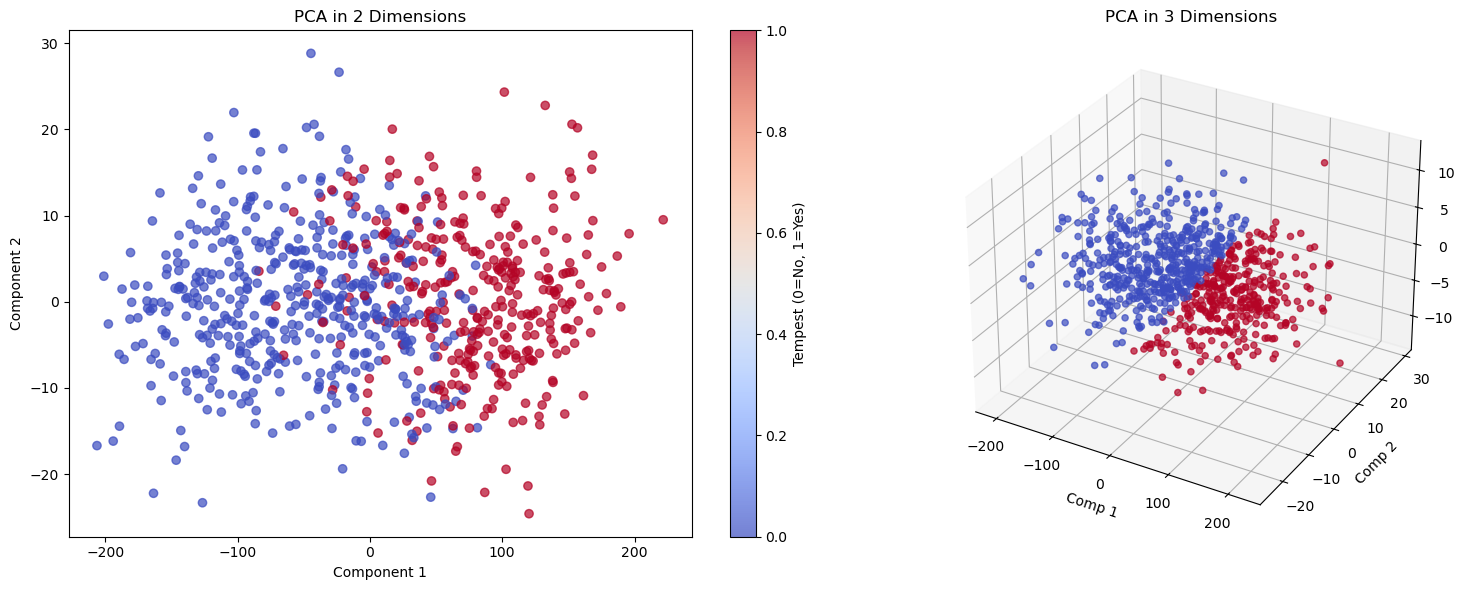

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(16, 6))

# Plot 2D
ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='coolwarm', alpha=0.7)
ax1.set_title('PCA in 2 Dimensions')
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
plt.colorbar(scatter1, ax=ax1, label='Tempest (0=No, 1=Yes)')

# Plot 3D
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='coolwarm', alpha=0.7)
ax2.set_title('PCA in 3 Dimensions')
ax2.set_xlabel('Comp 1')
ax2.set_ylabel('Comp 2')
ax2.set_zlabel('Comp 3')

plt.tight_layout()
plt.show()

## Method 2: t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE is a much more complex and **non-linear** method. It is capable of unfolding complicated shapes.

Calculating t-SNE (this make take a few seconds)...


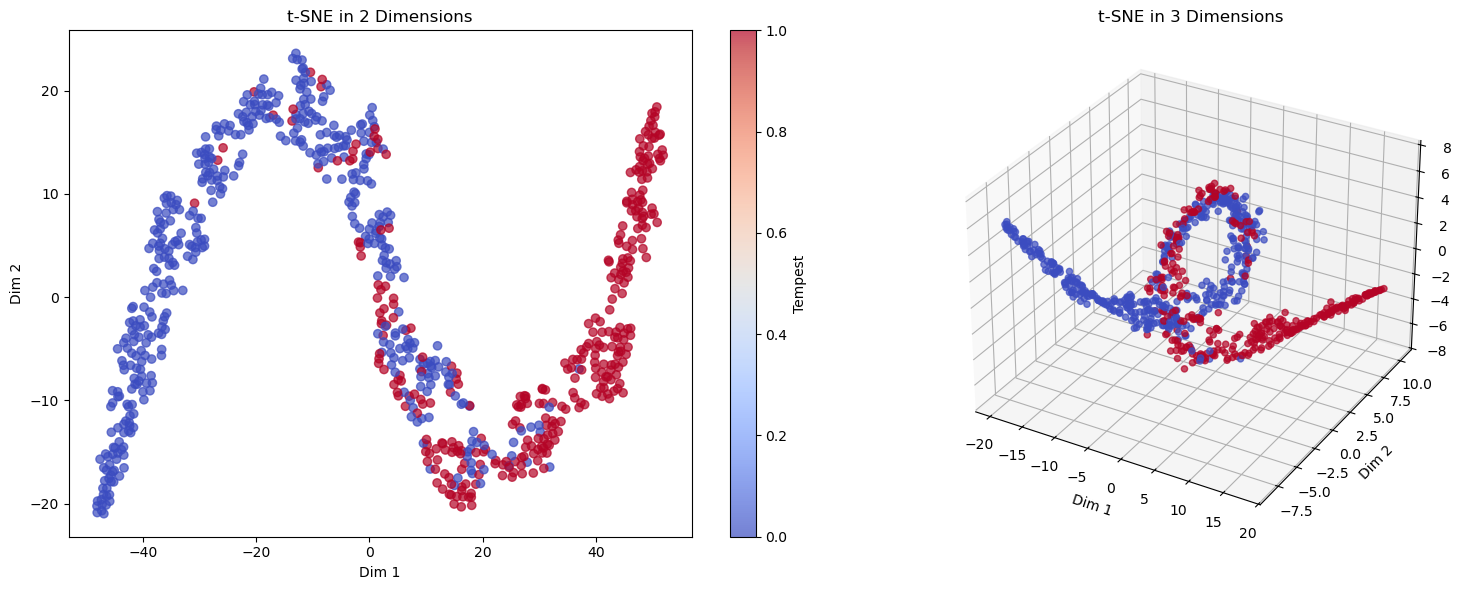

In [ ]:
print("Calculating t-SNE (this make take a few seconds)...")

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne_2d.fit_transform(X)

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X)

# --- Plotting ---
fig = plt.figure(figsize=(16, 6))

# Plot 2D
ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='coolwarm', alpha=0.7)
ax1.set_title('t-SNE in 2 Dimensions')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
plt.colorbar(scatter1, ax=ax1, label='Tempest')

# Plot 3D
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='coolwarm', alpha=0.7)
ax2.set_title('t-SNE in 3 Dimensions')
ax2.set_xlabel('Dim 1')
ax2.set_ylabel('Dim 2')
ax2.set_zlabel('Dim 3')

plt.tight_layout()
plt.show()